In [2]:
import sys
sys.path += ["../src"]
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import numpy as np
import repeat_function
import simulator_opinion_dynamics as sod

from opinion_dynamics_models_estimation import simulate_BC
import pandas as pd


from MSM_calibrator import calibrate_params_ABM
from MSM_simulators import BC_simulator, BC_simulator_positive_observations, BC_simulator_X_evidences, BC_simulator_X_evidences_backfire

import torch

In [3]:
N, T, edge_per_t, evidences_per_t = 100, 64, 16, 8

epsilon, mu = np.random.random(2) / 2
rho = 16

In [4]:
X, edges, evidences = simulate_BC(N, T, edge_per_t, evidences_per_t, (epsilon, mu, rho))

# Simulations

### Simple BC

In [5]:
simulator = BC_simulator(X[0], edges, N, mu, epsilon, rho)

In [6]:
calibration_df, time_calibration = calibrate_params_ABM(simulator, calibration_batches = 400, ensemble_size = 1)

In [7]:
calibration_df["epsilon"][0], epsilon

(0.01, 0.0036750534871107243)

In [8]:
calibration_df

,loss,epsilon
0,0.238561,0.0100
1,0.238561,0.0090
2,0.268320,0.0891
3,0.304233,0.0110
4,0.305190,0.0920
...,...,...
395,17.628800,0.4817
396,17.628800,0.4778
397,17.628800,0.4836
398,17.679366,0.4856


In [9]:
def complete_simulation_and_calibration_simple_BC(N, T, edge_per_t, rho, calibration_batches = 400, ensemble_size = 1, seed = None):
    np.random.seed(seed)
    epsilon, mu = np.random.random(2) / 2
    X, edges, _ = simulate_BC(N, T, edge_per_t, evidences_per_t, (epsilon, mu, rho))
    simulator = BC_simulator(X[0], edges, N, mu, epsilon, rho)
    calibration_df, time_calibration = calibrate_params_ABM(simulator, calibration_batches = calibration_batches, ensemble_size = ensemble_size)
    
    return {"real_epsilon": epsilon, 
            "mu": mu, 
            "rho": rho, 
            "estimated_epsilon": calibration_df["epsilon"][0], 
            "time_calibration": time_calibration,
            "calibration_batches": calibration_batches, "ensemble_size": ensemble_size
           }


In [ ]:
cals = repeat_function.rep_simulations(complete_simulation_and_calibration_simple_BC, 
                                {"rho": 16, "N": 100}, 
                                {"ensemble_size": [1],
                                 "calibration_batches": [400],
                                 "edge_per_t": [1,4,16,64],
                                 "T": [16, 32, 64, 128, 256]
                                }, repetitions = 24)


In [11]:
cals_simple_bc_df = pd.DataFrame([{**cal[0], **cal[1]} for cal in cals]).assign(distance_epsilon = lambda x: np.abs(x["estimated_epsilon"] - x["real_epsilon"]))
#cals_simple_bc_df.to_csv("../data/repeat_msm_simple_bc_230717.csv", index = None)

### BC positive observation

In [12]:
simulator = BC_simulator_positive_observations(X[0], edges, N, mu, epsilon, rho)

In [13]:
calibration_df, time_calibration = calibrate_params_ABM(simulator, calibration_batches = 400, ensemble_size = 1)

In [14]:
calibration_df["epsilon"][0], epsilon

(0.033600000000000005, 0.0036750534871107243)

In [15]:
calibration_df

,loss,epsilon
0,0.209842,0.0336
1,0.219099,0.1059
2,0.230813,0.0951
3,0.244672,0.0434
4,0.256054,0.1107
...,...,...
395,19.132409,0.4801
396,19.158586,0.4606
397,19.162866,0.4450
398,20.648002,0.4984


In [16]:
def complete_simulation_and_calibration_BC_observed_positive(N, T, edge_per_t, rho, calibration_batches = 400, ensemble_size = 1, seed = None):
    np.random.seed(seed)
    epsilon, mu = np.random.random(2) / 2
    X, edges, _ = simulate_BC(N, T, edge_per_t, evidences_per_t, (epsilon, mu, rho))
    simulator = BC_simulator_positive_observations(X[0], edges, N, mu, epsilon, rho)
    calibration_df, time_calibration = calibrate_params_ABM(simulator, calibration_batches = calibration_batches, ensemble_size = ensemble_size)
    
    return {"real_epsilon": epsilon, 
            "mu": mu, 
            "rho": rho, 
            "estimated_epsilon": calibration_df["epsilon"][0], 
            "time_calibration": time_calibration,
            "calibration_batches": calibration_batches, "ensemble_size": ensemble_size
           }


In [17]:
complete_simulation_and_calibration_BC_observed_positive(100, 20, 2, 16, calibration_batches = 20, ensemble_size = 1)

{'real_epsilon': 0.2764379668309778,
 'mu': 0.06797368742229487,
 'rho': 16,
 'estimated_epsilon': 0.2053,
 'time_calibration': 0.32663536071777344,
 'calibration_batches': 20,
 'ensemble_size': 1}

In [ ]:
cals = repeat_function.rep_simulations(complete_simulation_and_calibration_BC_observed_positive, 
                                {"rho": 16, "N": 100}, 
                                {"ensemble_size": [1],
                                 "calibration_batches": [400],
                                 "edge_per_t": [1,4,16,64],
                                 "T": [16, 32, 64, 128, 256]
                                }, repetitions = 24)


In [19]:
cals_pos_obs_df = pd.DataFrame([{**cal[0], **cal[1]} for cal in cals]).assign(distance_epsilon = lambda x: np.abs(x["estimated_epsilon"] - x["real_epsilon"]))
#cals_pos_obs_df.to_csv("../data/repeat_msm_bc_observe_positive_230717.csv", index = None)

In [20]:
#cals_pos_obs_df = pd.read_csv("../data/repeat_msm_bc_observe_positive_230717.csv")

### BC with evidences

In [22]:
simulator = BC_simulator_X_evidences(N, edges, evidences, mu, epsilon, rho = rho)

In [23]:
calibration_df, time_calibration = calibrate_params_ABM(simulator, calibration_batches = 400, ensemble_size = 1)

In [24]:
calibration_df["epsilon"][0], epsilon

(0.2846, 0.0036750534871107243)

In [25]:
calibration_df

,loss,epsilon
0,3.099844,0.2846
1,3.155251,0.2865
2,3.361093,0.2836
3,3.361093,0.2826
4,3.469512,0.0102
...,...,...
395,8.921545,0.4672
396,8.946724,0.4897
397,8.982129,0.4945
398,8.982129,0.4955


In [26]:
def complete_simulation_and_calibration_BC_with_evidences(N, T, edge_per_t, evidences_per_t, rho, calibration_batches = 400, ensemble_size = 1, seed = None):
    np.random.seed(seed)
    epsilon, mu = np.random.random(2) / 2
    X, edges, evidences = simulate_BC(N, T, edge_per_t, evidences_per_t, (epsilon, mu, rho))
    simulator = BC_simulator_X_evidences(N, edges, evidences, mu, epsilon, rho = rho)
    calibration_df, time_calibration = calibrate_params_ABM(simulator, calibration_batches = calibration_batches, ensemble_size = ensemble_size)
    
    return {"real_epsilon": epsilon, 
            "mu": mu, 
            "rho": rho, 
            "estimated_epsilon": calibration_df["epsilon"][0], 
            "time_calibration": time_calibration,
            "calibration_batches": calibration_batches, "ensemble_size": ensemble_size
           }


In [ ]:
cals = repeat_function.rep_simulations(complete_simulation_and_calibration_BC_with_evidences, 
                                {"rho": 16, "N": 100}, 
                                {"ensemble_size": [1],
                                 "calibration_batches": [400],
                                 "edge_per_t": [1,4,16,64],
                                 "evidences_per_t": [2,4,8,16],
                                 "T": [16, 32, 64, 128, 256]
                                }, repetitions = 24)


In [28]:
cals_bc_evidences_df = pd.DataFrame([{**cal[0], **cal[1]} for cal in cals]).assign(distance_epsilon = lambda x: np.abs(x["estimated_epsilon"] - x["real_epsilon"]))
#cals_bc_evidences_df.to_csv("../data/repeat_msm_bc_evidences_230717.csv", index = None)

In [62]:
#simple_bc_msm_df = pd.read_csv("../data/repeat_msm_simple_bc_230713.csv").assign(distance_epsilon = lambda x: np.abs(x["estimated_epsilon"] - x["real_epsilon"]))
#pos_obs_msm_df = pd.read_csv("../data/repeat_msm_bc_observe_positive_230713.csv").assign(distance_epsilon = lambda x: np.abs(x["estimated_epsilon"] - x["real_epsilon"]))

# Analysis

In [42]:
cals_simple_bc_df = pd.read_csv("../data/repeat_msm_simple_bc_230717.csv")
cals_pos_obs_df = pd.read_csv("../data/repeat_msm_bc_observe_positive_230717.csv")
cals_bc_evidences_df = pd.read_csv("../data/repeat_msm_bc_evidences_230717.csv")


## Simple_BC

<AxesSubplot:xlabel='edge_per_t', ylabel='distance_epsilon'>

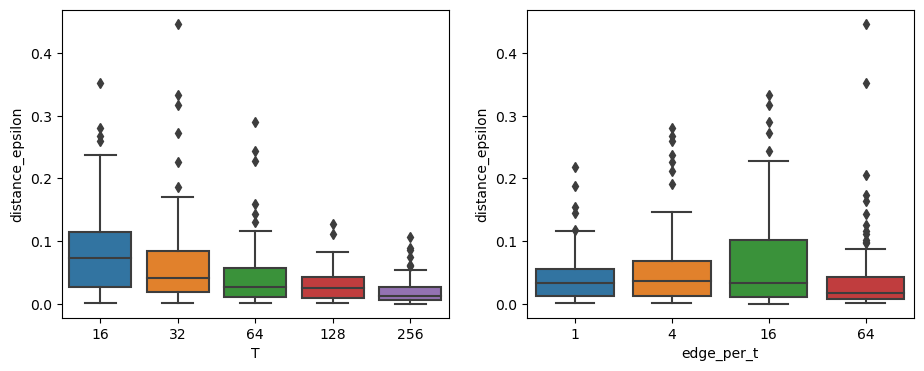

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (11, 4))

sns.boxplot(data = cals_simple_bc_df, x = "T", y = "distance_epsilon", ax = axes[0])
sns.boxplot(data = cals_simple_bc_df, x = "edge_per_t", y = "distance_epsilon", ax = axes[1])

<AxesSubplot:xlabel='T', ylabel='edge_per_t'>

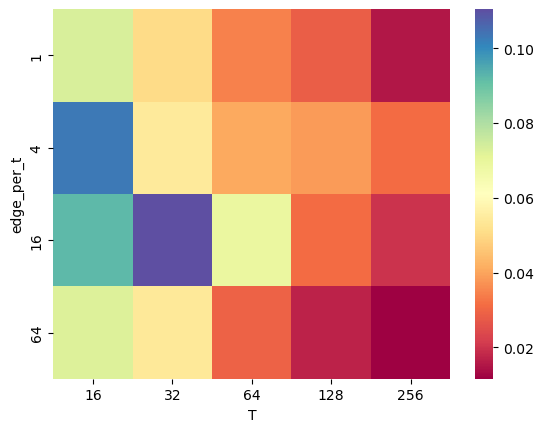

In [34]:
sns.heatmap(cals_simple_bc_df.groupby(["edge_per_t", "T"]).mean()["distance_epsilon"].unstack(), cmap = "Spectral")

<AxesSubplot:xlabel='mu', ylabel='distance_epsilon'>

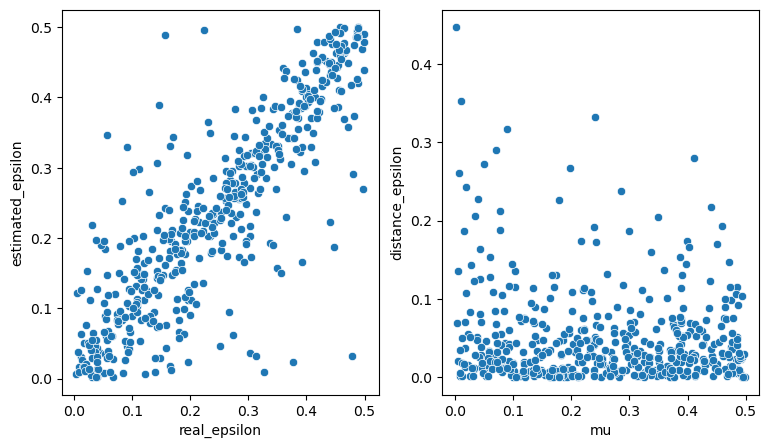

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 5))

sns.scatterplot(data = cals_simple_bc_df, x = "real_epsilon", y = "estimated_epsilon", ax = axes[0])
sns.scatterplot(data = cals_simple_bc_df, x = "mu", y = "distance_epsilon", ax = axes[1])

## Observed_positive

<AxesSubplot:xlabel='edge_per_t', ylabel='distance_epsilon'>

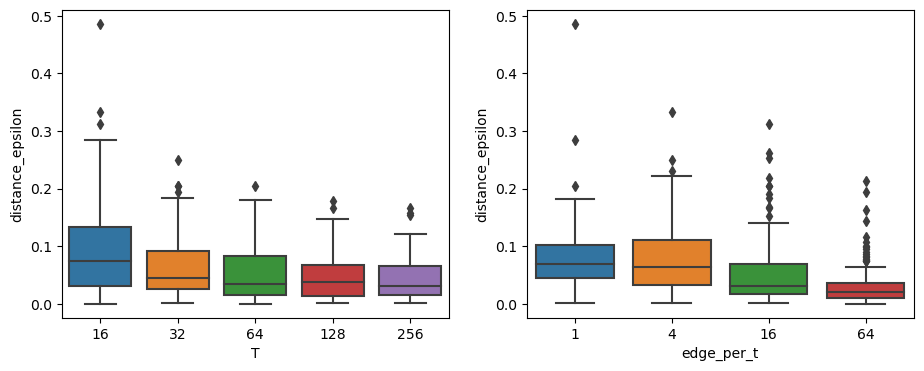

In [60]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (11, 4))

sns.boxplot(data = cals_pos_obs_df, x = "T", y = "distance_epsilon", ax = axes[0])
sns.boxplot(data = cals_pos_obs_df, x = "edge_per_t", y = "distance_epsilon", ax = axes[1])

<AxesSubplot:xlabel='T', ylabel='edge_per_t'>

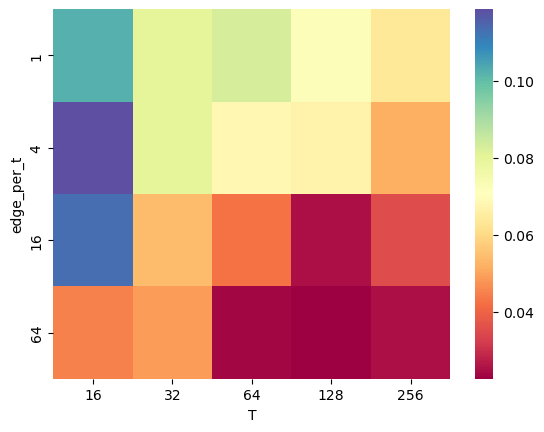

In [43]:
sns.heatmap(cals_pos_obs_df.groupby(["edge_per_t", "T"]).mean()["distance_epsilon"].unstack(), cmap = "Spectral")

<AxesSubplot:xlabel='mu', ylabel='distance_epsilon'>

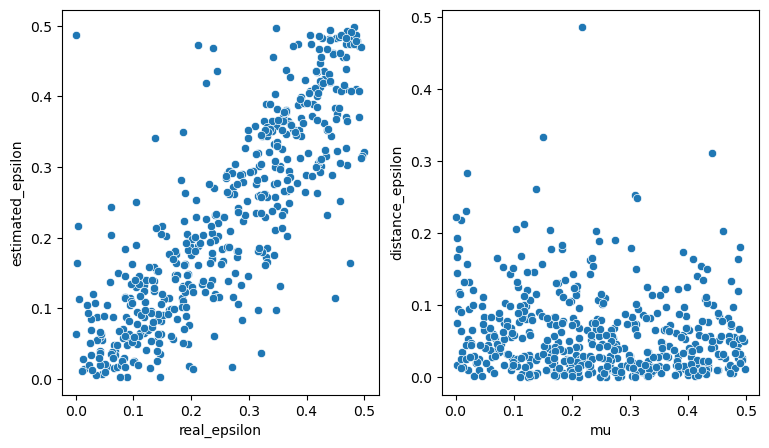

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 5))

sns.scatterplot(data = cals_pos_obs_df, x = "real_epsilon", y = "estimated_epsilon", ax = axes[0])
sns.scatterplot(data = cals_pos_obs_df, x = "mu", y = "distance_epsilon", ax = axes[1])

## Evidence_X

<AxesSubplot:xlabel='evidences_per_t', ylabel='distance_epsilon'>

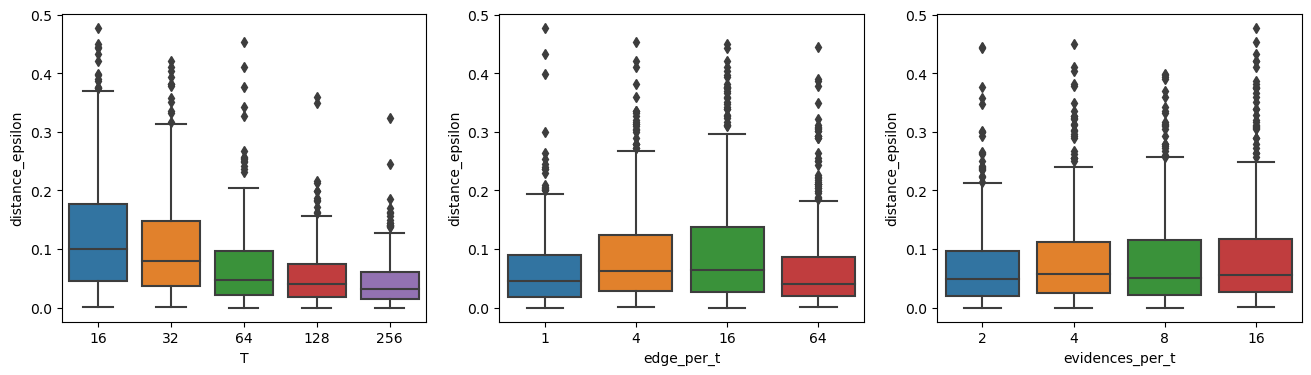

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

sns.boxplot(data = cals_bc_evidences_df, x = "T", y = "distance_epsilon", ax = axes[0])
sns.boxplot(data = cals_bc_evidences_df, x = "edge_per_t", y = "distance_epsilon", ax = axes[1])
sns.boxplot(data = cals_bc_evidences_df, x = "evidences_per_t", y = "distance_epsilon", ax = axes[2])

<AxesSubplot:xlabel='T', ylabel='edge_per_t'>

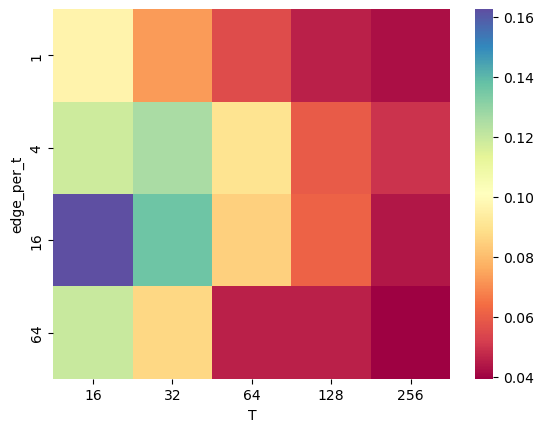

In [45]:
sns.heatmap(cals_bc_evidences_df.groupby(["edge_per_t", "T"]).mean()["distance_epsilon"].unstack(), cmap = "Spectral")

<AxesSubplot:xlabel='T', ylabel='evidences_per_t'>

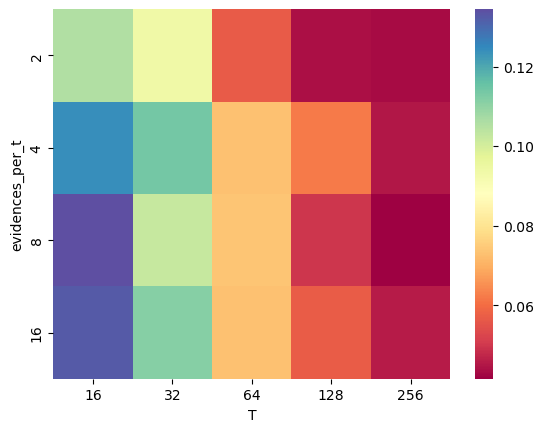

In [54]:
sns.heatmap(cals_bc_evidences_df.groupby(["evidences_per_t", "T"]).mean()["distance_epsilon"].unstack(), cmap = "Spectral")

<AxesSubplot:xlabel='mu', ylabel='distance_epsilon'>

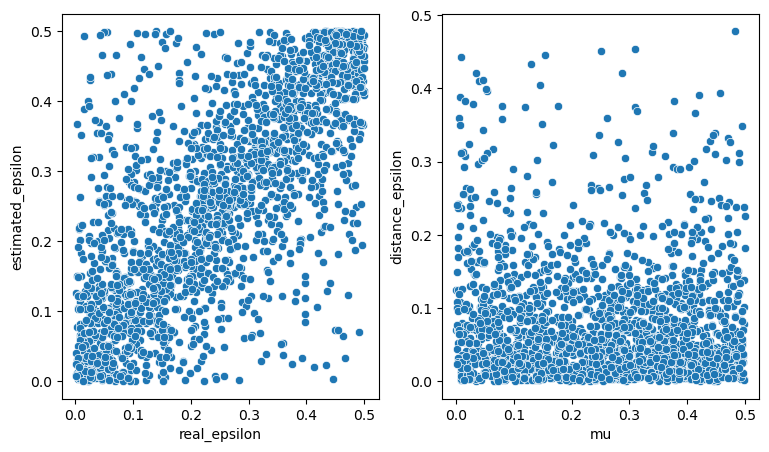

In [51]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 5))

sns.scatterplot(data = cals_bc_evidences_df, x = "real_epsilon", y = "estimated_epsilon", ax = axes[0])
sns.scatterplot(data = cals_bc_evidences_df, x = "mu", y = "distance_epsilon",  ax = axes[1])

##  Backfire

In [1]:
import sys
sys.path += ["../src"]
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import numpy as np
import repeat_function
import simulator_opinion_dynamics as sod

from opinion_dynamics_models_estimation import simulate_BC
import pandas as pd


from MSM_calibrator import calibrate_params_ABM
from MSM_simulators import BC_simulator, BC_simulator_positive_observations, BC_simulator_X_evidences, BC_simulator_X_evidences_backfire

import torch

In [25]:
N, T, edge_per_t, evidences_per_t = 100, 64, 16, 8

epsilon_plus, epsilon_minus = 0.11, 0.8
mu_plus, mu_minus = np.random.random(2) / 2
rho = 16

In [26]:
X, edges, evidences = simulate_BC(N, T, edge_per_t, evidences_per_t, (epsilon_plus, epsilon_minus, mu_plus, mu_minus, rho), model = "backfire")

In [27]:
simulator = BC_simulator_X_evidences_backfire(N, edges, evidences, mu_plus, mu_minus, epsilon_plus, epsilon_minus, rho = rho)


In [ ]:
calibration_df, time_calibration = calibrate_params_ABM(simulator, 
                                                        parameters_names = ["epsilon_plus", "epsilon_minus"],
                                                        precisions = [0.0001, 0.0001],
                                                        parameters_bounds = [[0.,0.], [1.,1.]],
                                                        calibration_batches = 400, ensemble_size = 1)

In [29]:
epsilon_plus, epsilon_minus

(0.11, 0.8)

In [42]:
def complete_simulation_and_calibration_BC_backfire(N, T, edge_per_t, evidences_per_t, rho, calibration_batches = 400, ensemble_size = 1, seed = None):
    np.random.seed(seed)
    epsilon_plus, epsilon_minus = sorted(np.random.random(2))
    mu_plus, mu_minus = np.random.random(2) / 2

    X, edges, evidences = simulate_BC(N, T, edge_per_t, evidences_per_t, (epsilon_plus, epsilon_minus, mu_plus, mu_minus, rho), model = "backfire")
    simulator = BC_simulator_X_evidences_backfire(N, edges, evidences, mu_plus, mu_minus, epsilon_plus, epsilon_minus, rho = rho)
    calibration_df, time_calibration = calibrate_params_ABM(simulator, 
                                                            parameters_names = ["epsilon_plus", "epsilon_minus"],
                                                            precisions = [0.0001, 0.0001],
                                                            parameters_bounds = [[0.,0.], [1.,1.]],
                                                            calibration_batches = calibration_batches, 
                                                            ensemble_size = ensemble_size)
    calibration_df[["epsilon_plus","epsilon_minus"]] = calibration_df[["epsilon_plus","epsilon_minus"]].apply(lambda x: pd.Series(sorted(x), index = ["epsilon_plus","epsilon_minus"]), axis = 1)
    
    
    return {"real_epsilon_plus": epsilon_plus, 
            "real_epsilon_minus": epsilon_minus, 
            "mu_plus": mu_plus, 
            "mu_minus": mu_minus, 
            "rho": rho, 
            "estimated_epsilon_plus": calibration_df["epsilon_plus"][0], 
            "estimated_epsilon_minus": calibration_df["epsilon_minus"][0], 
            "time_calibration": time_calibration,
            "calibration_batches": calibration_batches, "ensemble_size": ensemble_size
           }


In [ ]:
cals = repeat_function.rep_simulations(complete_simulation_and_calibration_BC_backfire, 
                                {"rho": 16, "N": 100}, 
                                {"ensemble_size": [1],
                                 "calibration_batches": [400],
                                 "edge_per_t": [1,4,16,64],
                                 "evidences_per_t": [2,4,8,16],
                                 "T": [16, 32, 64, 128, 256]
                                }, repetitions = 24)


In [44]:
cals_bc_backfire_df = pd.DataFrame([{**cal[0], **cal[1]} for cal in cals])\
.assign(distance_epsilon_plus = lambda x: np.abs(x["estimated_epsilon_plus"] - x["real_epsilon_plus"]),
        distance_epsilon_minus = lambda x: np.abs(x["estimated_epsilon_minus"] - x["real_epsilon_minus"])
       )
cals_bc_backfire_df.to_csv("../data/repeat_msm_bc_backfire_230725.csv", index = None)

In [46]:
cals_bc_backfire_df

,ensemble_size,calibration_batches,edge_per_t,evidences_per_t,T,real_epsilon_plus,real_epsilon_minus,mu_plus,mu_minus,rho,estimated_epsilon_plus,estimated_epsilon_minus,time_calibration,distance_epsilon_plus,distance_epsilon_minus
0,1,400,1,2,16,0.309977,0.310928,0.395295,0.446154,16,0.2257,0.2789,9.897050,0.084277,0.032028
1,1,400,1,2,32,0.600120,0.880169,0.421934,0.457823,16,0.5206,0.9564,13.174285,0.079520,0.076231
2,1,400,1,2,64,0.224099,0.955824,0.172794,0.142146,16,0.2477,0.9585,20.430589,0.023601,0.002676
3,1,400,1,2,128,0.272403,0.879861,0.107659,0.114499,16,0.2294,0.8171,34.210418,0.043003,0.062761
4,1,400,1,2,256,0.518096,0.855124,0.261803,0.322402,16,0.5005,0.7324,62.447305,0.017596,0.122724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,400,64,16,16,0.333720,0.975210,0.146438,0.463853,16,0.3286,0.9171,8.087341,0.005120,0.058110
1916,1,400,64,16,32,0.159326,0.746785,0.345930,0.178906,16,0.2545,0.2750,11.431277,0.095174,0.471785
1917,1,400,64,16,64,0.069521,0.937888,0.032979,0.434328,16,0.4224,0.9592,18.187624,0.352879,0.021312
1918,1,400,64,16,128,0.207895,0.473606,0.253795,0.361357,16,0.0843,0.6450,31.419250,0.123595,0.171394
